In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')
#print sys.path

import caffe

../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [2]:
import cv2

In [3]:
caffe.set_mode_gpu()
net = caffe.Net(caffe_root + 'models/swimmers_fullconv/test_dt.prototxt', 
                caffe_root + 'models/swimmers_fullconv/test_dt.protobuf', caffe.TEST)
net.reshape()

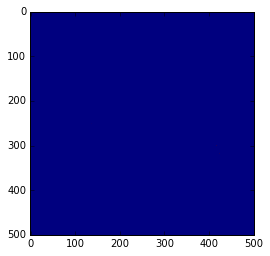

In [4]:
#image = np.zeros(500,500)
#print image
image = np.zeros((500,500))

image[51, 117] = 1
image[299, 414] = 1
image[317, 420] = 1
image[470, 499] = 1
image[250, 137] = 1
#image = caffe.io.load_image(caffe_root + 'models/swimmers_fullconv/swimmer01.jpg')
plt.imshow(image)


In [5]:
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
#transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
#mu = np.array([103.9, 116.8, 123.68])
#transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
#transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
#transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

transformed_image = transformer.preprocess('data', image)
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = image

### perform classification
output = net.forward()

(500, 500)


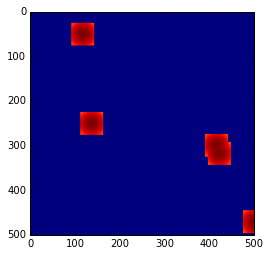

In [6]:
idprMap = net.blobs['idpr_dt'].data[0,0,:,:].copy()
print idprMap.shape
plt.imshow(idprMap[:,:])

In [7]:
map2 = net.blobs['max_vals'].data[0,0,:,:]
map2.shape

(500, 500, 2)

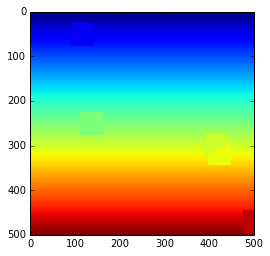

In [8]:
plt.imshow(map2[:,:,0])

[ 299.  414.]


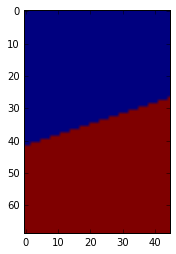

In [16]:
plt.imshow(map2[274:343,395:440,1])
print(map2[277,420])